# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
import requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Step 2: Create a Beautiful Soup object to parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Step 3: Locate the table in the page
    table = soup.find('table', class_='table')  # Locate the table element

    # Step 4: Extract the headers
    headers = [th.text.strip() for th in table.find_all('th')]

    # Step 5: Extract all rows from the table
    rows = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        rows.append(cols)

    # Step 6: Create a DataFrame with the extracted data
    mars_data_df = pd.DataFrame(rows, columns=headers)

    # Step 7: Display the DataFrame
    print(mars_data_df)

else:
    print(f"Failed to retrieve data: {response.status_code}")

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [5]:
# Examine data type of each column
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [7]:
# Change data types for data analysis
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'], errors='coerce')

    # Convert sol and month to integers
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(int)

mars_data_df['month'] = mars_data_df['month'].astype(int)

    # Convert min_temp and pressure to floats
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)


In [8]:
# Confirm type changes were successful by examining data types again
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [9]:
# 1. How many months are there on Mars?
# Number of unique months on Mars
num_mars_months = mars_data_df['month'].nunique()
print(f"There are {num_mars_months} months on Mars.")

There are 12 months on Mars.


In [10]:
# 2. How many sols (Martian days) worth of data are there?
# Number of unique Martian days
num_martian_days = mars_data_df['sol'].nunique()
print(f"There are {num_martian_days} Martian days in the dataset.")

There are 1867 Martian days in the dataset.


In [11]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = mars_data_df.groupby('month')['min_temp'].mean()
avg_min_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

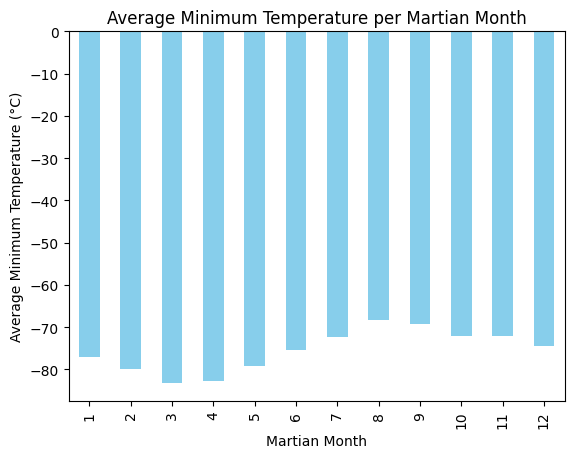

The coldest month on Mars is Month 3.
The warmest month on Mars is Month 8.


In [12]:
# Plot the average minimum temperature by month
avg_min_temp_per_month.plot(kind='bar', color='skyblue', title='Average Minimum Temperature per Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xlabel('Martian Month')
plt.show()

# Coldest and warmest months
coldest_month = avg_min_temp_per_month.idxmin()
warmest_month = avg_min_temp_per_month.idxmax()

print(f"The coldest month on Mars is Month {coldest_month}.")
print(f"The warmest month on Mars is Month {warmest_month}.")

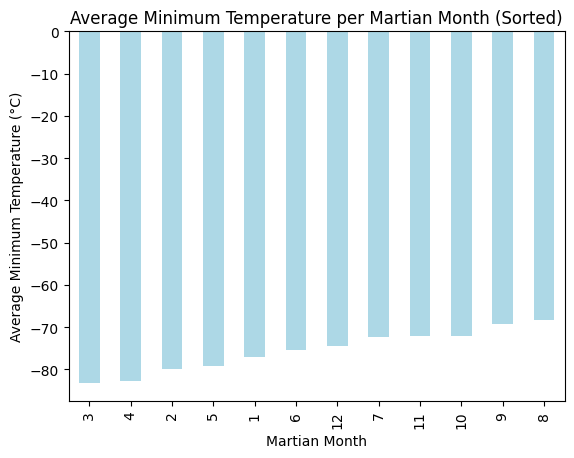

In [13]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_per_month = avg_min_temp_per_month.sort_values()

# Plot the sorted average minimum temperatures
sorted_avg_min_temp_per_month.plot(kind='bar', color='lightblue', title='Average Minimum Temperature per Martian Month (Sorted)')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xlabel('Martian Month')
plt.show()

In [14]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_data_df.groupby('month')['pressure'].mean()
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

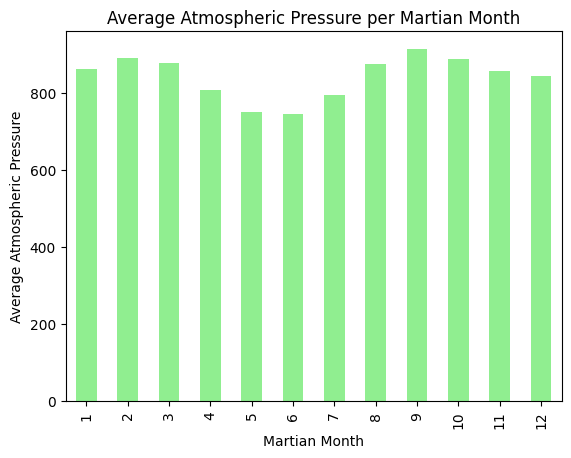

The month with the lowest atmospheric pressure on Mars is Month 6.
The month with the highest atmospheric pressure on Mars is Month 9.


In [15]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', color='lightgreen', title='Average Atmospheric Pressure per Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xlabel('Martian Month')
plt.show()

# Lowest and highest pressure months
lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()

print(f"The month with the lowest atmospheric pressure on Mars is Month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure on Mars is Month {highest_pressure_month}.")

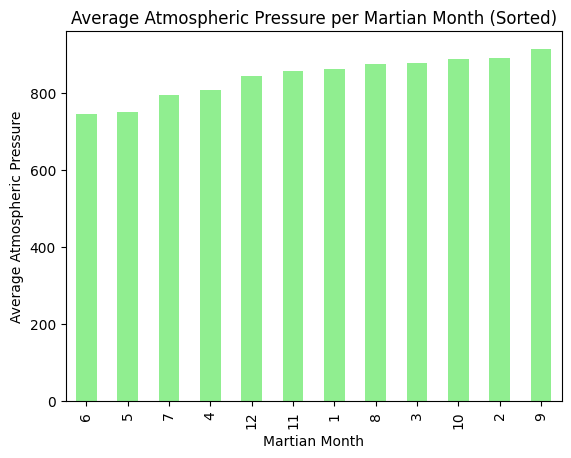

In [16]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_per_month = avg_pressure_per_month.sort_values()

# Plot the sorted average atmospheric pressures
sorted_avg_pressure_per_month.plot(kind='bar', color='lightgreen', title='Average Atmospheric Pressure per Martian Month (Sorted)')
plt.ylabel('Average Atmospheric Pressure')
plt.xlabel('Martian Month')
plt.show()

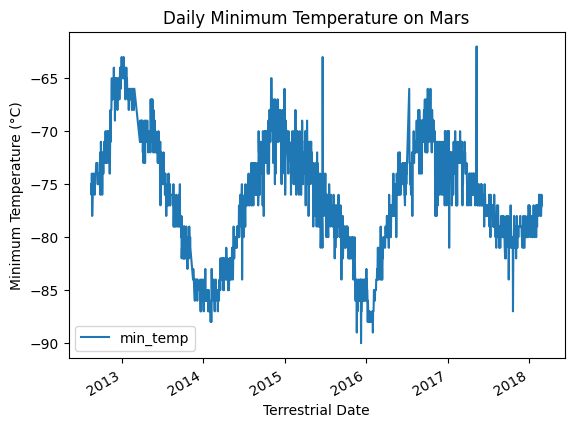

In [17]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_data_df.plot(x='terrestrial_date', y='min_temp', kind='line', title='Daily Minimum Temperature on Mars')
plt.ylabel('Minimum Temperature (°C)')
plt.xlabel('Terrestrial Date')
plt.show()

#### Minimum Temperature
The coldest month on Mars is Month 3.
The warmest month on Mars is Month 8

#### Atmospheric Pressure
The month with the lowest atmospheric pressure on Mars is Month 6.
The month with the highest atmospheric pressure on Mars is Month 9.

#### Year Length

There are 1867 Martian days in the dataset.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [18]:
# Write the data to a CSV
mars_data_df.to_csv('mars_data.csv')

In [19]:
browser.quit()